In [1]:
# The following lines import the necessary packages
import pandas as pd

import matplotlib.cm
from matplotlib import colors
import matplotlib.pyplot as plt # For plotting
import numpy as np              # For working with numerical data
import sklearn.cluster as sklc  # For clustering
import sklearn.metrics as sklm  # For the silhouette score

from sklearn.preprocessing import RobustScaler
import sklearn


In [2]:
# This line sets the number of clusters you want to find:
num_clusters = 4

In [3]:
file_data_simple = 'https://raw.githubusercontent.com/yujingDING/qm_assignment/main/hw2_4.csv'
data = pd.read_csv(file_data_simple)
#You can print it to have a look if you want:
#print(data)
data = data.drop('borough',axis=1)
data.head()

,year,theft,robbery,burglary,total_property_crime,total_crime,unemployment(tousands),earnings,number of NVQ4+ aged 16-64,Population estimate,Population per square kilometre
0,2015,25065,1547,3162,29774,49037,7700,656.0,104200,242299,11277
1,2015,6485,457,2395,9337,23226,9900,670.1,152500,315134,9197
2,2015,4730,652,2236,7618,21650,9300,476.3,77900,271825,7004
3,2015,7333,1136,2577,11046,28600,12000,554.9,98600,295909,14959
4,2015,2259,166,1274,3699,10877,5600,498.3,54700,200537,4574


Text(0.5, 1.0, 'Scatter plot of unemployement and preperty crime')

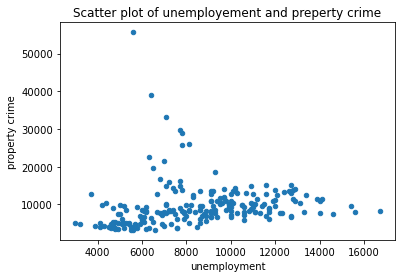

In [4]:
# a scatter plot of this data
ax = data.plot.scatter(x = 'unemployment(tousands)', y = 'total_property_crime')
ax.set_xlabel("unemployment")
ax.set_ylabel("property crime")
ax.set_title("Scatter plot of unemployement and preperty crime")

In [5]:
# 标准化
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

data_standardised = data.copy()
for c in data.columns.values:
    data_standardised[c] = mms.fit_transform(data[c].values.reshape(-1,1))
data_standardised.head()

,year,theft,robbery,burglary,total_property_crime,total_crime,unemployment(tousands),earnings,number of NVQ4+ aged 16-64,Population estimate,Population per square kilometre
0,0.0,0.517238,0.330660,0.620593,0.506124,0.533915,0.343066,0.616193,0.445139,0.335128,0.624101
1,0.0,0.099672,0.080889,0.424630,0.116224,0.180087,0.503650,0.653260,0.780556,0.621713,0.481606
2,0.0,0.060230,0.125573,0.384006,0.083429,0.158483,0.459854,0.143796,0.262500,0.451304,0.331369
3,0.0,0.118730,0.236480,0.471129,0.148829,0.253756,0.656934,0.350421,0.406250,0.546068,0.876344
4,0.0,0.004697,0.014207,0.138222,0.008661,0.010802,0.189781,0.201630,0.101389,0.170806,0.164897


In [6]:
data_final = data_standardised.drop(['theft','robbery', 'burglary', 'total_crime','earnings',
                        'number of NVQ4+ aged 16-64','Population estimate',
                        'Population per square kilometre','year'],axis=1)

data_final.head()

,total_property_crime,unemployment(tousands)
0,0.506124,0.343066
1,0.116224,0.503650
2,0.083429,0.459854
3,0.148829,0.656934
4,0.008661,0.189781


In [7]:
# we fix the random_state so that the kmeans result is reproducible
random_state_seed = 100
kmeans_output = sklc.KMeans(n_clusters = num_clusters, random_state = random_state_seed).fit(data_final)

# Sanity check
print(kmeans_output)      

KMeans(n_clusters=4, random_state=100)


In [8]:
# This line creates a list giving the final cluster number of each point:
clustering_ids_kmeans = kmeans_output.labels_

# You can print the clustering IDs to get an ordered list of labels
print(clustering_ids_kmeans)

[2 0 0 1 3 1 3 0 1 3 1 1 3 3 0 0 0 0 3 0 3 0 0 0 1 1 0 0 1 0 1 0 3 0 3 1 3
 0 1 1 0 0 1 3 0 3 3 0 0 0 3 3 1 1 3 1 0 3 1 3 1 0 0 2 0 0 3 1 0 2 1 0 0 0
 0 3 0 3 3 0 0 0 3 3 0 0 3 0 0 3 1 3 1 0 0 2 3 0 3 0 0 2 1 0 0 0 0 3 0 3 3
 0 0 0 3 3 1 0 3 0 0 3 1 3 0 3 0 2 3 0 3 0 3 2 1 0 0 0 0 3 0 3 3 3 0 0 3 3
 1 0 3 0 3 3 0 3 0 0 0 2 0 1 3 1 0 0 1 1 1 0 1 3 1 3 3 0 0 0 3 3 1 1 3 1 0
 3 1 3 1 1 1 2 0 1 3 1 0 0 1 1 1 1 0 3 1 0 0 1 1 0 3 3 1 0 0 1 1 3 1 3 1 1
 1 2]


In [9]:
# we will combine the clustering IDs to the dataframe

data_cluster = data.assign(cluster_id = clustering_ids_kmeans)

# Have a look at the result:
# print(data_cluster)
data_cluster.head()

,year,theft,robbery,burglary,total_property_crime,total_crime,unemployment(tousands),earnings,number of NVQ4+ aged 16-64,Population estimate,Population per square kilometre,cluster_id
0,2015,25065,1547,3162,29774,49037,7700,656.0,104200,242299,11277,2
1,2015,6485,457,2395,9337,23226,9900,670.1,152500,315134,9197,0
2,2015,4730,652,2236,7618,21650,9300,476.3,77900,271825,7004,0
3,2015,7333,1136,2577,11046,28600,12000,554.9,98600,295909,14959,1
4,2015,2259,166,1274,3699,10877,5600,498.3,54700,200537,4574,3


In [10]:
data_cluster.rename(columns={'unemployment(tousands)':'unemployment'},inplace = True)

data_cluster.head()

,year,theft,robbery,burglary,total_property_crime,total_crime,unemployment,earnings,number of NVQ4+ aged 16-64,Population estimate,Population per square kilometre,cluster_id
0,2015,25065,1547,3162,29774,49037,7700,656.0,104200,242299,11277,2
1,2015,6485,457,2395,9337,23226,9900,670.1,152500,315134,9197,0
2,2015,4730,652,2236,7618,21650,9300,476.3,77900,271825,7004,0
3,2015,7333,1136,2577,11046,28600,12000,554.9,98600,295909,14959,1
4,2015,2259,166,1274,3699,10877,5600,498.3,54700,200537,4574,3


In [11]:
# 缩尾

from scipy.stats.mstats import winsorize

df_list = ['total_property_crime'] #需要进行缩尾的列名

for i in df_list:
    data_cluster[i] = winsorize(data_cluster[i],limits=[0.05, 0.05]) #对指定列中的连续数据进行1%和99%的缩尾（Winsorize）处理

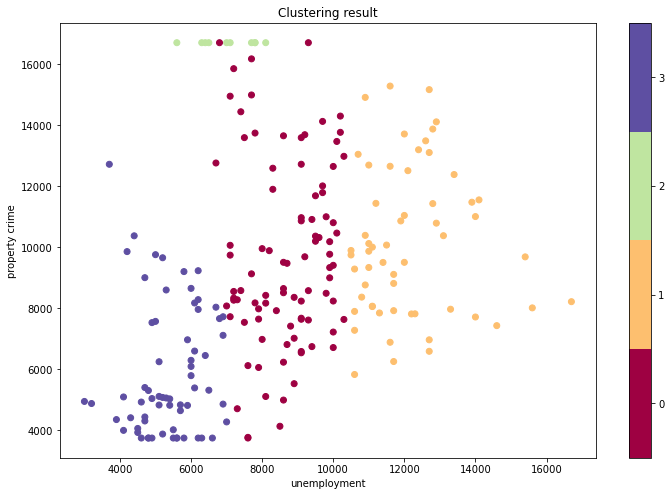

In [12]:
fig, ax = plt.subplots(figsize=(12,8))

# number of clusters
n_clusters = data_cluster.cluster_id.nunique()

# get discrete colormap
cmap = plt.get_cmap('Spectral', n_clusters)

# scatter points
scatter = ax.scatter(data_cluster.unemployment, data_cluster.total_property_crime, c = data_cluster.cluster_id, cmap = cmap)
ax.set_xlabel('unemployment')
ax.set_ylabel('property crime')
ax.set_title('Clustering result')

# add colorbar
cbar = plt.colorbar(scatter)

# set ticks locations (not very elegant, but it works):
# - shift by 0.5
# - scale so that the last value is at the center of the last color
tick_locs = (np.arange(n_clusters) + 0.5)*(n_clusters-1)/n_clusters
cbar.set_ticks(tick_locs)

# set tick labels (as before)
cbar.set_ticklabels(np.arange(n_clusters))